The dataset is taken from https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/ in their Loan Prediction Problem. The aim is to classified if an applicant is eligible for a loan based on several features.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [98]:
# load data
data = pd.read_csv('train_loan.csv')

In [99]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [101]:
# data types
data.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [102]:
data.select_dtypes(include=['object']).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [103]:
data.select_dtypes(include=['float64']).head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,NaN,360.0,1.0
1,1508.0,128.0,360.0,1.0
2,0.0,66.0,360.0,1.0
3,2358.0,120.0,360.0,1.0
4,0.0,141.0,360.0,1.0


In [104]:
data.select_dtypes(include=['int64']).head()

,ApplicantIncome
0,5849
1,4583
2,3000
3,2583
4,6000


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

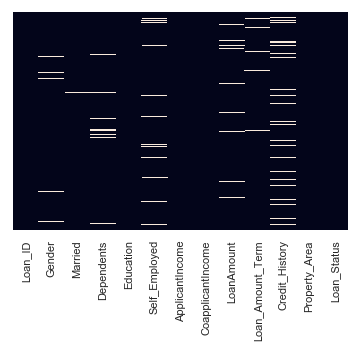

In [105]:
# missing values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

data.isnull().sum()/len(data)*100

- there are some missing values in the columns of GENDER, MARRIED, DEPENDENTS, SELF EMPLOYED, LOAN AMOUNT, LOAN AMOUNT TERM and CREDIT HISTORY.

In [106]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- 5 features are in numerical values.

## EDA

In [107]:
sns.set_theme(style="whitegrid")

Text(0.5,1,'Histogram of Applicant Income')

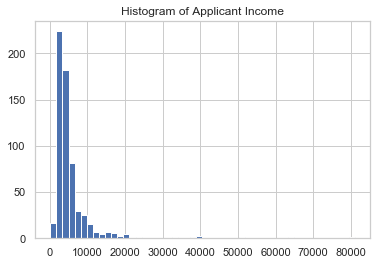

In [108]:
data['ApplicantIncome'].hist(bins=50)

plt.title('Histogram of Applicant Income')

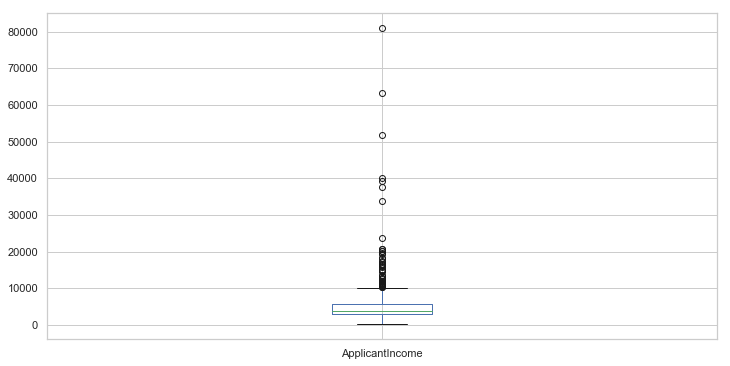

In [109]:
plt.figure(figsize=(12,6))
data.boxplot(column='ApplicantIncome')

- there are a couple outliers likely due to income disparity in the society, this needs a deeper understanding.

Text(0.5,1,'Histogram of Coapplicant Income')

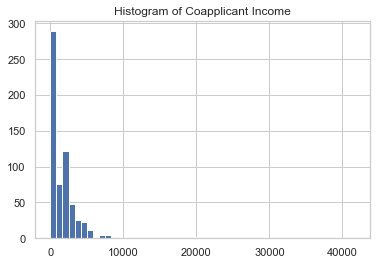

In [110]:
data['CoapplicantIncome'].hist(bins=50)

plt.title('Histogram of Coapplicant Income')

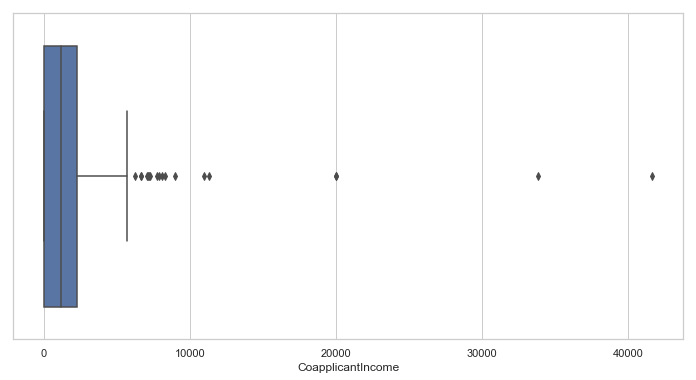

In [111]:
plt.figure(figsize=(12,6))
sns.boxplot(x='CoapplicantIncome', data=data)

- the coapplicant income is much less (about 2 times) compared to the applicant income, however there are also a few outliers.

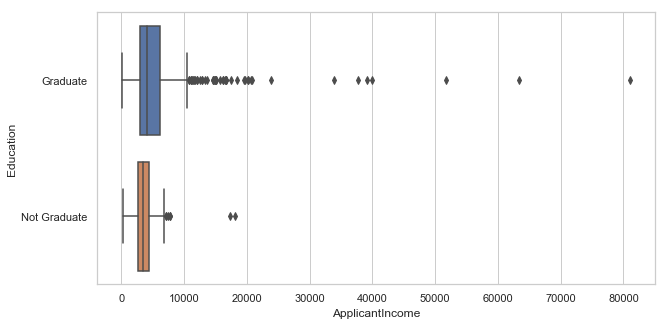

In [112]:
plt.figure(figsize=(10,5))
sns.boxplot(x='ApplicantIncome', y='Education', data=data)

- those who have a graduate degree earns more income.
- however, the mean income between graduate and non-graduate are almost similar.
- there are a few high incomes from gradutes as represented by the outliers.

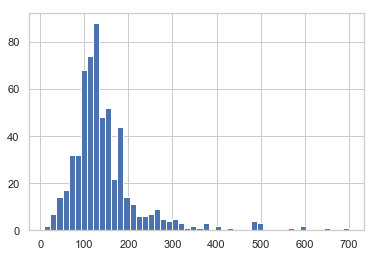

In [113]:
data['LoanAmount'].hist(bins=50)

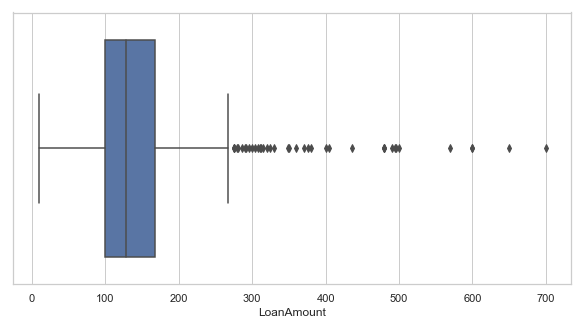

In [114]:
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanAmount', data=data)

- there are a few extreme values too in the LOAN AMOUNT column, which also needs a deeper understanding.
- some data cleaning is needed due to missing values present.

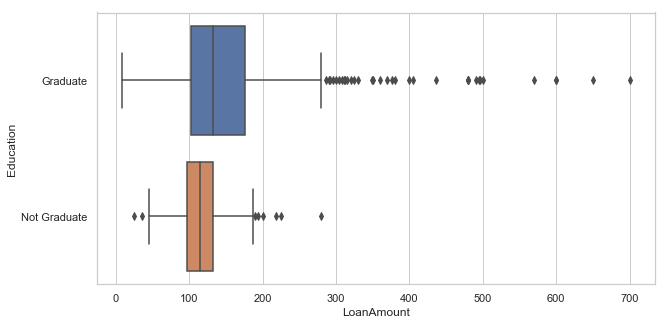

In [115]:
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanAmount', y='Education', data=data)

- graduates tend to loan more compared to non-graduates.
- however their mean loan amount is slightly similar.
- graduates have a few outliers.

In [116]:
data['Credit_History'].value_counts(dropna=False)

 1.0    475
 0.0     89
NaN      50
Name: Credit_History, dtype: int64

Text(0.5,1,'Applicants by CREDIT HISTORY')

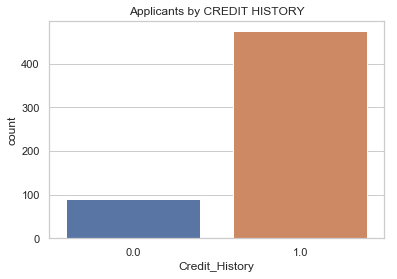

In [117]:
sns.countplot(x='Credit_History', data=data)
plt.title('Applicants by CREDIT HISTORY')

Text(0.5,1,'Applicants CREDIT HISTORY with LOAN STATUS')

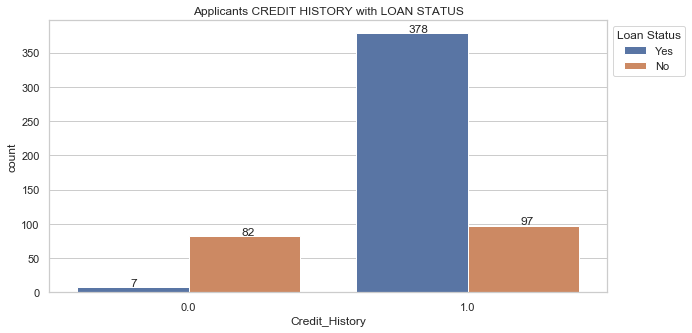

In [118]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Credit_History', data=data, hue='Loan_Status')

for p in ax.patches:
        b = p.get_bbox()
        value = p.get_height()
        ax.annotate(str(value), (b.x1-0.21, b.y1+2))


plt.legend(['Yes','No'],title='Loan Status',
           bbox_to_anchor=(1,1), loc=2)

plt.title('Applicants CREDIT HISTORY with LOAN STATUS')

In [119]:
# probability of LOAN STATUS a yes based on CREDIT HISTORY
data.groupby('Credit_History')['Loan_Status'].describe()[['count','freq']]

,count,freq
Credit_History,,
0.0,89,82
1.0,475,378


- Applicants who have a good credit history have a higher chance of success in getting a loan.

Text(0.5,1,'Applicants LOAN STATUS by GENDER')

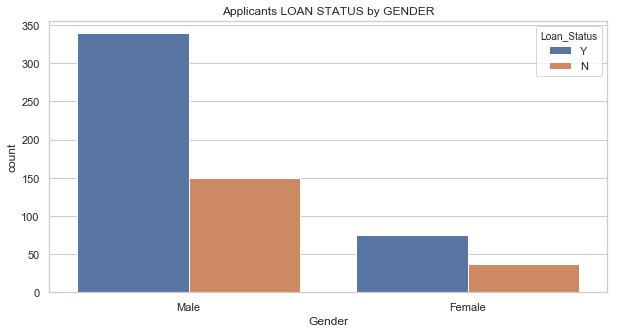

In [120]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Gender', data=data, hue='Loan_Status')

plt.title('Applicants LOAN STATUS by GENDER')

- Most of the applicants are male.

Text(0.5,1,'Applicants CREDIT HISTORY AND GENDER by LOAN STATUS')

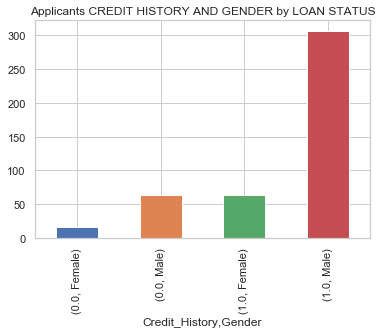

In [121]:
data.groupby(['Credit_History','Gender'])['Loan_Status'].describe()['freq'].plot(kind='bar')
plt.title('Applicants CREDIT HISTORY AND GENDER by LOAN STATUS')

Text(0.5,1,'Applicants LOAN STATUS by MARRIED status')

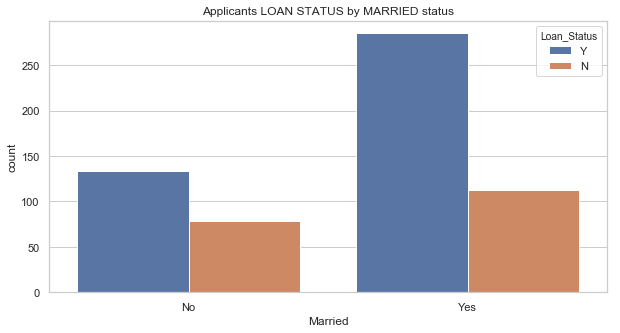

In [122]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Married', data=data, hue='Loan_Status')

plt.title('Applicants LOAN STATUS by MARRIED status')

- Most of the applicants are married.

Text(0.5,1,'Applicants CREDIT HISTORY, GENDER and MARRIED status by LOAN STATUS')

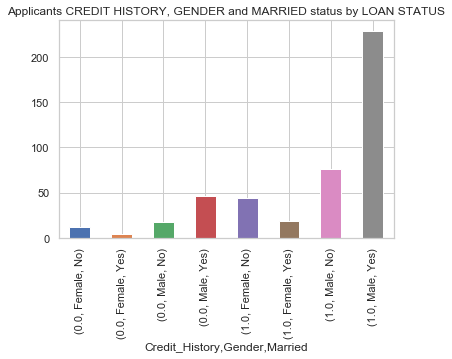

In [123]:
data.groupby(['Credit_History','Gender','Married'])['Loan_Status'].describe()['freq'].plot(kind='bar')
plt.title('Applicants CREDIT HISTORY, GENDER and MARRIED status by LOAN STATUS')

- Applicants who are male and have a good credit history regardless of their married status tends to have a higher chance of getting a loan.

Text(0.5,1,'Applicants LOAN STATUS by SELF EMPLOYED status')

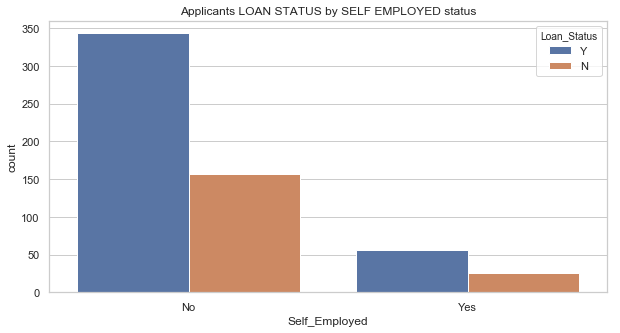

In [124]:
plt.figure(figsize=(10,5))
sns.countplot(x='Self_Employed', data=data, hue='Loan_Status')

plt.title('Applicants LOAN STATUS by SELF EMPLOYED status')

- Applicants who are not self employed have a higher chance of getting a loan

Text(0.5,1,'Applicants LOAN STATUS by PROPERTY AREA')

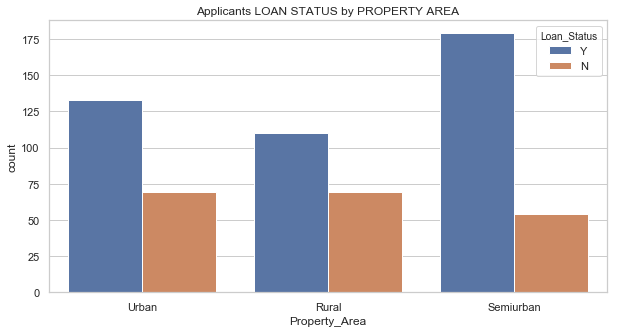

In [125]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area', data=data, hue='Loan_Status')

plt.title('Applicants LOAN STATUS by PROPERTY AREA')

- Applicants who lived in semiurban areas are better at getting a loan. 
- However, there's not much of a difference between urban and rural applicants.
- This might mean that the loan is approved does not take into account where the applicant's lived.

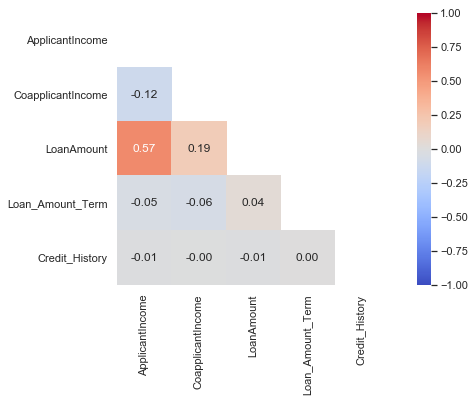

In [126]:
# Create a mask
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), mask=mask, annot=True,
            fmt='.2f', square=True, cmap='coolwarm', 
            vmin=-1, vmax=1)

## Data Cleaning

In [127]:
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

- the columns that have missing values only have less than 10% missing.
- we can try to remove these values, but we have to look through them to decide.

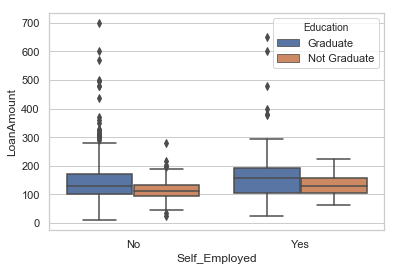

In [128]:
sns.boxplot(y='LoanAmount', x='Self_Employed', data=data, hue='Education')

- the mean LOAN AMOUNT varies based on the applicants EDUCATION level and SELF EMPLOYED status.
- due to there is some missing values in SELF EMPLOYED column, we need to fill it with something reasonable before imputing the mean into the missing LOAN AMOUNT column.

In [129]:
data['Self_Employed'].value_counts()/len(data)*100

No     81.433225
Yes    13.355049
Name: Self_Employed, dtype: float64

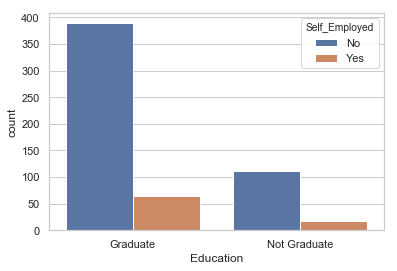

In [130]:
sns.countplot(x='Education',data=data,hue='Self_Employed')

- since about 81% are no in the SELF EMPLOYED column, it is a reasonable assumption to conclude that the others are no too.

#### Fill Missing Values for SELF EMPLOYED

In [131]:
data['Self_Employed'].fillna('No',inplace=True)

#### Impute Missing Values for LOAN AMOUNT

In [132]:
data.groupby(['Education','Self_Employed'])['LoanAmount'].median()

Education     Self_Employed
Graduate      No               130.0
              Yes              157.5
Not Graduate  No               113.0
              Yes              130.0
Name: LoanAmount, dtype: float64

- due to large amounts of outliers in LOAN AMOUNT, the median is chosen to replace the missing values.

In [133]:
def fill_loan(cols):
    edu = cols[0]
    self = cols[1]
    
    if edu == 'Graduate':
        if self == 'No':
            return 130.0
        else:
            return 157.5
        
    elif edu == 'Not Graduate':
        if self == 'No':
            return 113.0
        else:
            return 130.0


In [134]:
data['LoanAmount'].fillna(data[['Education','Self_Employed']].apply(fill_loan, axis=1), inplace=True)

#### Other Categorical Missing Values

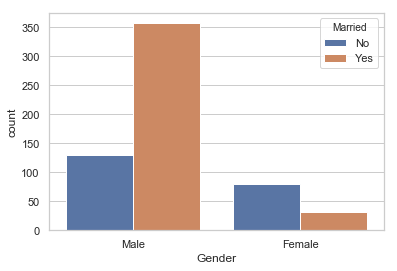

In [135]:
sns.countplot(x='Gender', data=data, hue='Married')

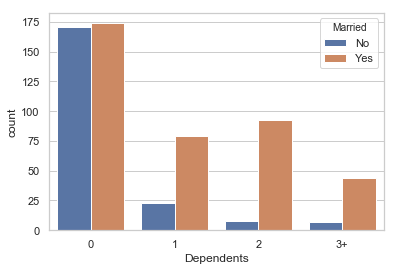

In [136]:
sns.countplot(x='Dependents', data=data, hue='Married')

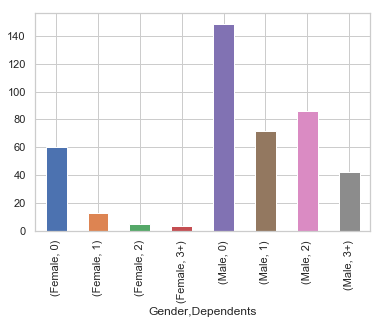

In [137]:
data.groupby(['Gender','Dependents'])['Married'].describe()['freq'].plot(kind='bar')

- since there is a large number of applicants who are male, married and have zero dependence, we shall take this assumption for the missing values.

In [138]:
data['Gender'].fillna('Male', inplace=True)
data['Married'].fillna('Yes', inplace=True)
data['Dependents'].fillna('0', inplace=True)

#### Other Numerical Missing Values

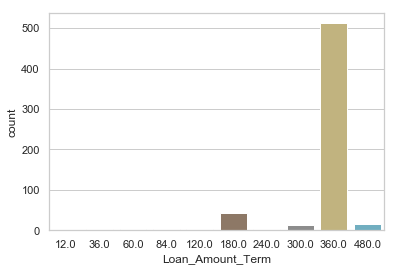

In [139]:
sns.countplot(x='Loan_Amount_Term', data=data)

- since the most LOAN AMOUNT TERM are 360 months, we shall take this as the assumption for the missing values.

In [140]:
data.groupby('Credit_History')[['Education','Self_Employed']].describe()

Education                       Self_Employed                
                   count unique       top freq         count unique top freq
Credit_History                                                              
0.0                   89      2  Graduate   63            89      2  No   77
1.0                  475      2  Graduate  380           475      2  No  412

- applicants who have an EDUCATION and not SELF EMPLOYED tends to have a good CREDIT HISTORY.
- by using this assumption, the missing values in CREDIT HISTORY will be replace with a 1.

In [141]:
data['Loan_Amount_Term'].fillna(360.0, inplace=True)
data['Credit_History'].fillna(1.0, inplace=True)

In [142]:
data.isnull().sum()/len(data)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

- most of the assumptions made are purely based on the hard assumption according to their higher frequency occurence, other methods which look into the probability may be made.

#### Outliers

- besides removing outliers, it's better to use log transform to nullify the effects.

In [143]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])

Text(0.5,1,'LOG-LOAN AMOUNT')

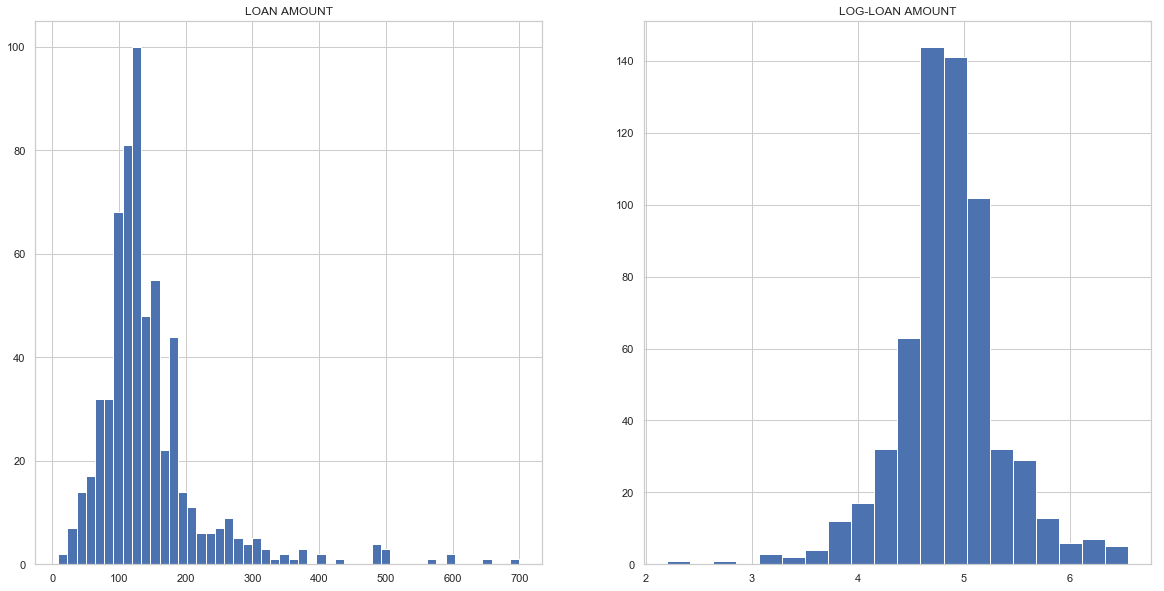

In [144]:
fig, axes = plt.subplots(1,2, figsize=(20,10), sharey=True)

plt.subplot(1,2,1)
data['LoanAmount'].hist(bins=50)
plt.title('LOAN AMOUNT')

plt.subplot(1,2,2)
data['LoanAmount_log'].hist(bins=20)
plt.title('LOG-LOAN AMOUNT')

- the effects of the outliers have been reduced while using log transform.

In [145]:
data['Total_income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

data['Total_income_log'] = np.log(data['Total_income'])

Text(0.5,1,'Historgram of Log-TOTAL INCOME')

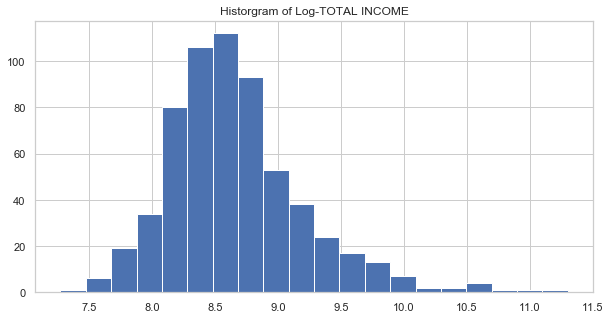

In [146]:
plt.figure(figsize=(10,5))

data['Total_income_log'].hist(bins=20)
plt.title('Historgram of Log-TOTAL INCOME')

- there might be some applicants with a lower income but a co-applicant with a higher income that might determine the success rate of the loan.

## Data Pre-processing

#### Encode Categorical Values

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
label = ['Dependents','Loan_Status']

one = ['Gender','Married','Education','Self_Employed','Property_Area']

In [149]:
le = LabelEncoder()

for n in label:
    data[n] = le.fit_transform(data[n])
    
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_income,Total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,1,4.867534,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515


In [150]:
data_encode = pd.get_dummies(data, columns=one, drop_first=True)

data_encode.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Total_income,Total_income_log,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,130.0,360.0,1.0,1,4.867534,5849.0,8.674026,1,0,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,4.852030,6091.0,8.714568,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,4.189655,3000.0,8.006368,1,1,0,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,4.787492,4941.0,8.505323,1,1,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,4.948760,6000.0,8.699515,1,0,0,0,0,1


#### Split data to training and testing

In [151]:
X = data_encode.drop(['Loan_Status','ApplicantIncome','CoapplicantIncome','LoanAmount','Total_income','Loan_ID'], axis=1)

y = data_encode['Loan_Status']

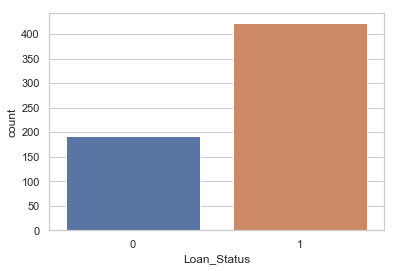

In [152]:
sns.countplot(x='Loan_Status', data=data)

- due to imbalance of data, when splitting the data for testing, enable stratify.

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=101)

## Model Selection

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

In [155]:
models = []

models.append(('LogReg', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DTC', DecisionTreeClassifier(random_state=101)))
models.append(('RFC', RandomForestClassifier(random_state=101)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

In [156]:
# StratifiedKFold use for classification, KFold use for regression
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [157]:
# using k-fold of 10 for cross validation
results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=skfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LogReg: 0.804719118091211 (0.04056132598787734)
LDA: 0.804719118091211 (0.04056132598787734)
DTC: 0.7066747206282089 (0.08137010017842515)
RFC: 0.7467658310681566 (0.08981408059736432)
KNN: 0.6996904258532164 (0.07219511891475518)
NB: 0.7953035336756267 (0.041974218280152874)
SVM: 0.7858879492600422 (0.04416585029254119)


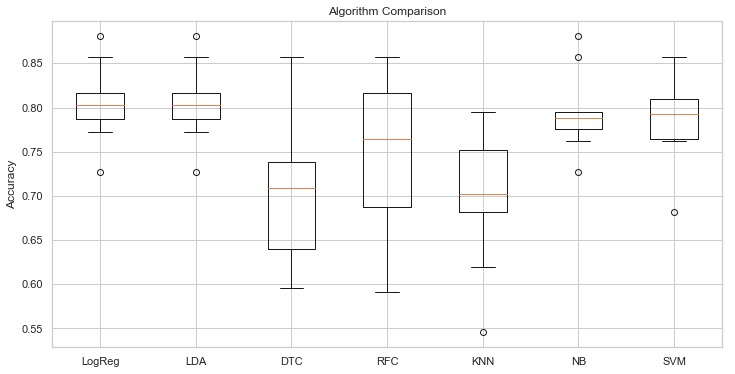

In [158]:
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

- LogReg and LDA both perform the best, SVM can be chosen as a secondary option for testing. RFC can also be chosen, eventhoug it has a large variance but by tuning it's parameters a better model might be found.

## Evaluation & Validation


#### Logistic Regression

In [159]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

print(f'Training score: {logreg.score(X_train, y_train)}')
print(f'Test score: {logreg.score(X_test, y_test)}')

Training score: 0.8041958041958042
Test score: 0.8216216216216217


In [160]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 28  30]
 [  3 124]]
             precision    recall  f1-score   support

          0       0.90      0.48      0.63        58
          1       0.81      0.98      0.88       127

avg / total       0.84      0.82      0.80       185



#### SVM

In [161]:
svm = SVC()

svm.fit(X_train, y_train)

pred = svm.predict(X_test)

print(f'Training score: {svm.score(X_train, y_train)}')
print(f'Test score: {svm.score(X_test, y_test)}')

Training score: 0.8111888111888111
Test score: 0.8


In [162]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 26  32]
 [  5 122]]
             precision    recall  f1-score   support

          0       0.84      0.45      0.58        58
          1       0.79      0.96      0.87       127

avg / total       0.81      0.80      0.78       185



#### RFC

In [163]:
rfc = RandomForestClassifier(random_state=101)

rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

print(f'Training score: {rfc.score(X_train, y_train)}')
print(f'Test score: {rfc.score(X_test, y_test)}')

Training score: 0.9790209790209791
Test score: 0.8


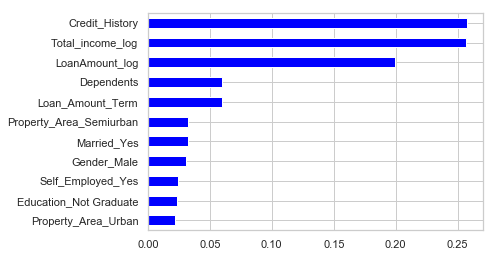

In [164]:
feaimp = pd.Series(rfc.feature_importances_, index=X.keys()).sort_values(ascending=True)

feaimp.plot(kind='barh', 
            color='blue')

- based on the feature importance of the rfc model, the top 5 features will be chosen for modelling.

In [165]:
chosen_fea = ['Credit_History','Total_income_log','LoanAmount_log','Dependents','Loan_Amount_Term']

X_train_chosen = X_train[chosen_fea]

X_test_chosen = X_test[chosen_fea]

##### Parameter tuning using GridsearchCV


In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
# find max_features sqrt(5) is 2
param_grid = {'max_features': [n for n in range(1,5)]}

In [168]:
skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)

In [169]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=101), param_grid=param_grid, cv=skfold)

grid_search.fit(X_train_chosen, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [170]:
grid_search.best_params_

{'max_features': 2}

In [171]:
grid_search.best_score_

0.7412587412587412

In [172]:
rfc = RandomForestClassifier(max_features=2, random_state=101)

rfc.fit(X_train_chosen, y_train)

pred = rfc.predict(X_test_chosen)

print(f'Training score: {rfc.score(X_train_chosen, y_train)}')
print(f'Test score: {rfc.score(X_test_chosen, y_test)}')

Training score: 0.9836829836829837
Test score: 0.7351351351351352


- the training score is very high as compared to the test score, this might means the model is overfit.
- the testing score has been reduced too.